# Lesson 1: The Python language (workbook)

Import statements: run these first.

In [1]:
# Python standard library
import numbers
import json
import math

# Scientific Python ecosystem
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Particle physics tools
from hepunits import GeV
from particle import Particle
import vector

Use these empty cells to try things on your own.

In [2]:
dataset = json.load(open("../data/SMHiggsToZZTo4L.json"))

In [3]:
type(dataset)

list

In [4]:
len(dataset)

10000

In [6]:
dataset[0:1]

[{'run': 1,
  'luminosityBlock': 156,
  'event': 46501,
  'PV': {'x': 0.24369880557060242,
   'y': 0.3936990201473236,
   'z': 1.451307773590088},
  'electron': [],
  'muon': [{'pt': 63.04386901855469,
    'eta': -0.7186822295188904,
    'phi': 2.968005895614624,
    'mass': 0.10565836727619171,
    'charge': 1,
    'pfRelIso03_all': 0.0,
    'pfRelIso04_all': 0.0,
    'dxy': -0.004785160068422556,
    'dxyErr': 0.0060764215886592865,
    'dz': 0.09005985409021378,
    'dzErr': 0.044572051614522934},
   {'pt': 38.12034606933594,
    'eta': -0.8794569969177246,
    'phi': -1.0324749946594238,
    'mass': 0.10565836727619171,
    'charge': -1,
    'pfRelIso03_all': 0.0,
    'pfRelIso04_all': 0.0,
    'dxy': 0.0005746808601543307,
    'dxyErr': 0.0013040687190368772,
    'dz': -0.0032290113158524036,
    'dzErr': 0.003023269586265087},
   {'pt': 4.04868745803833,
    'eta': -0.320764422416687,
    'phi': 1.0385035276412964,
    'mass': 0.10565836727619171,
    'charge': 1,
    'pfRelIso03

In [9]:
def to_vector(particle):
    return vector.obj(
        pt=particle["pt"],
        eta=particle["eta"],
        phi=particle["phi"],
        mass=particle["mass"],
    )

In [10]:
for particle in dataset[0]["muon"]:
    v = to_vector(particle)
    print(v.E, v.px, v.py, v.pz)

80.03810173614954 -62.09642131826239 10.888704252275756 -49.31082178393471
53.837451985499946 19.5441283607252 -32.729005959017954 -38.01709205284513
4.260074277908423 2.05475040026448 3.4885342087314886 -1.3210598131215057


In [12]:
len(dataset[0])

7

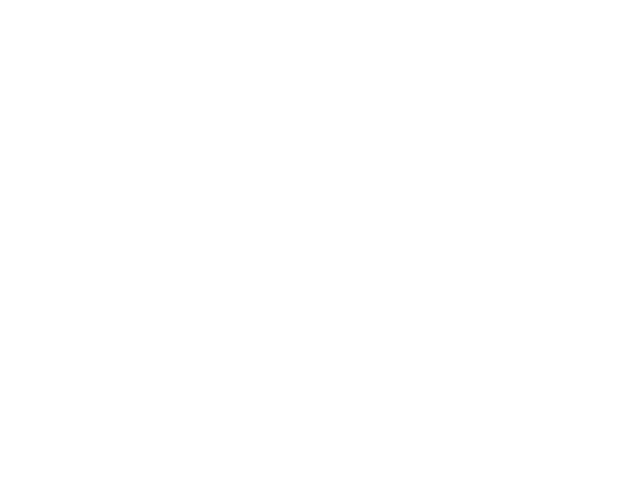

In [13]:
%matplotlib widget

fig = plt.figure()

In [53]:
fig.clf()  # clear figure
ax = fig.add_subplot(111, projection="3d")

# 25 Gaussian-distributed (x, y, z) triplets
for x, y, z in np.random.normal(0, 1, (25, 3)):
    # make a black line from (0, 0, 0) to (x, y, z)
    ax.plot([0, x], [0, y], [0, z], c="black")


In [17]:
def draw_particle(ax, particle, color):
    v = to_vector(particle)
    ax.plot([0, v.px], [0, v.py], [0, v.pz], c=color)

In [18]:
def draw_event(ax, event):
    for particle in event["electron"]:
        draw_particle(ax, particle, "blue")
    for particle in event["muon"]:
        draw_particle(ax, particle, "green")

In [19]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

draw_event(ax, dataset[0])

In [20]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

for event in dataset[0:10]:
    draw_event(ax, event)

We'll be using these equations a lot:

$$p = \sqrt{{p_x}^2 + {p_y}^2 + {p_z}^2}$$

$$m = \sqrt{E^2 - p^2}$$

**Quizlet:** Fix the mistake!

In [7]:
E = 68.1289790
px = -17.945541
py = 13.1652603
pz = 64.3908386

In [8]:
m = (E**2 - px**2 + py**2 + pz**2)**(1/2)
m

92.94632597460625

`m` should be `0.10565709514578395`. What was the mistake?

What can you do with this `muon` object?

In [ ]:
muon = Particle.from_name("mu+")
muon

In [ ]:
?muon

In [ ]:
dir(muon)

**Quizlet:** before you run the following, what will it do?

```python
type(type(1)("2"))
```

**Quizlet:** Before you run it, what will this do?

```python
some_list[2:8][3]
```

In [ ]:
some_list = [0.0, 1.1, 2.2, 33333, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 'mixed types']
some_dict = {'one': 1.1, 'two': 22222, 'three': 3.3, 123: 'mixed types'}

Starting from the observed electrons and muons, we reconstruct unobserved particles by adding energy and momentum.

<br>

<center>
<img src="../img/higgs-to-four-leptons-diagram.png" width="600px">
</center>

In [29]:
import json

import numpy as np
import vector

dataset = json.load(open("../data/SMHiggsToZZTo4L.json"))

def to_vector(particle):
    return vector.obj(
        pt=particle["pt"],
        eta=particle["eta"],
        phi=particle["phi"],
        mass=particle["mass"],
    )

In [30]:
electrons_and_muons = []   # collectively known as "leptons"

event = dataset[96]   # a nice event with 3 electrons and 3 muons

for particle in event["electron"]:
    electrons_and_muons.append({
        "type": "electron",
        "charge": particle["charge"],
        "vector": to_vector(particle),
    })

for particle in event["muon"]:
    electrons_and_muons.append({
        "type": "muon",
        "charge": particle["charge"],
        "vector": to_vector(particle),
    })

In [31]:
z_candidates_step0 = []

for index_i, particle_i in enumerate(electrons_and_muons):
    for index_j, particle_j in enumerate(electrons_and_muons):
        if index_i < index_j:
            z_candidates_step0.append({
                "index": [index_i, index_j],
                "types": [particle_i["type"], particle_j["type"]],
                "charge": particle_i["charge"] + particle_j["charge"],
                "vector": particle_i["vector"] + particle_j["vector"],
            })

In [32]:
len(z_candidates_step0)

15

In [33]:
z_candidates_step0

[{'index': [0, 1],
  'types': ['electron', 'electron'],
  'charge': 2,
  'vector': MomentumObject4D(pt=40.084151950131194, phi=-0.6580858017992637, eta=-1.2143331645098763, mass=32.24456915679218)},
 {'index': [0, 2],
  'types': ['electron', 'electron'],
  'charge': 0,
  'vector': MomentumObject4D(pt=6.464674561578544, phi=0.10078897794774777, eta=-3.989514832524117, mass=94.65200565609618)},
 {'index': [0, 3],
  'types': ['electron', 'muon'],
  'charge': 0,
  'vector': MomentumObject4D(pt=30.812644923851234, phi=-0.412697403556324, eta=-1.9702089194061905, mass=62.033974889441176)},
 {'index': [0, 4],
  'types': ['electron', 'muon'],
  'charge': 2,
  'vector': MomentumObject4D(pt=55.701820519681725, phi=-0.43045845531439664, eta=-1.1773805208456656, mass=30.631403745232788)},
 {'index': [0, 5],
  'types': ['electron', 'muon'],
  'charge': 2,
  'vector': MomentumObject4D(pt=39.473160288191224, phi=-0.6524413545119159, eta=-1.2506105973324255, mass=34.23861813708032)},
 {'index': [1, 2]

## Exercise 1

In [38]:
z_candidates_step1 = []

for x, candidate in enumerate(z_candidates_step0):
    if ((z_candidates_step0[x]['types']==['electron', 'electron'] or z_candidates_step0[x]['types']==['muon', 'muon']) and (z_candidates_step0[x]['charge']==0)):
        z_candidates_step1.append(candidate)

In [39]:
for candidate in z_candidates_step1:
    print(candidate["types"], candidate["vector"].mass)

['electron', 'electron'] 94.65200565609618
['electron', 'electron'] 3.417050436103103
['muon', 'muon'] 26.45024522236556
['muon', 'muon'] 3.2737370390909524


In [40]:
##enumerate helps get both the index and the item in the list at the same time... so we can say for this candidate iterating over x chose this index where the type class is e-e or mu-mu and give the condition for charge

## Exercise 2

In [46]:
higgs_candidates_step1 = []

for z_index1, z_candidate1 in enumerate(z_candidates_step1):
    for z_index2, z_candidate2 in enumerate(z_candidates_step1):
        if z_index1 < z_index2:
            lepton_i1, lepton_j1 = z_candidate1["index"]
            lepton_i2, lepton_j2 = z_candidate2["index"]
            if ((lepton_i1 != lepton_i2 and lepton_j1 != lepton_j2) and (lepton_i1 != lepton_j2 and lepton_j1 != lepton_i2)) :
                higgs_candidates_step1.append({
                    "z_candidates": [z_candidate1, z_candidate2],
                    "vector": z_candidate1["vector"] + z_candidate2["vector"],
                })

In [47]:
for higgs_candidate in higgs_candidates_step1:
    z_candidate1, z_candidate2 = higgs_candidate["z_candidates"]
    lepton_index1, lepton_index2 = z_candidate1["index"]
    lepton_index3, lepton_index4 = z_candidate2["index"]
    print(
        lepton_index1,
        lepton_index2,
        lepton_index3,
        lepton_index4,
        higgs_candidate["vector"].mass,
    )

0 2 3 4 129.0346159691587
0 2 3 5 118.8311777089631
1 2 3 4 56.10989169721264
1 2 3 5 12.750734071856588


In [48]:
higgs_candidates_step2 = {}

for higgs_candidate in higgs_candidates_step1:
    z_candidate1, z_candidate2 = higgs_candidate["z_candidates"]
    lepton_index1, lepton_index2 = z_candidate1["index"]
    lepton_index3, lepton_index4 = z_candidate2["index"]

    combination = tuple(sorted([
        lepton_index1, lepton_index2, lepton_index3, lepton_index4
    ]))

    if combination not in higgs_candidates_step2:
        higgs_candidates_step2[combination] = []

    higgs_candidates_step2[combination].append(higgs_candidate)

In [49]:
for combination in higgs_candidates_step2:
    print(combination)
    for higgs_candidate in higgs_candidates_step2[combination]:
        z_candidate1, z_candidate2 = higgs_candidate["z_candidates"]
        print(
            "    Higgs:",
            higgs_candidate["vector"].mass,
            "Z:",
            z_candidate1["vector"].mass,
            z_candidate2["vector"].mass,
        )

(0, 2, 3, 4)
    Higgs: 129.0346159691587 Z: 94.65200565609618 26.45024522236556
(0, 2, 3, 5)
    Higgs: 118.8311777089631 Z: 94.65200565609618 3.2737370390909524
(1, 2, 3, 4)
    Higgs: 56.10989169721264 Z: 3.417050436103103 26.45024522236556
(1, 2, 3, 5)
    Higgs: 12.750734071856588 Z: 3.417050436103103 3.2737370390909524


## Exercise 3

In [51]:
higgs_candidates_step3 = {}

for combination in higgs_candidates_step2:
    higgs_candidates_step3[combination] = []

    for higgs_candidate in higgs_candidates_step2[combination]:
        z_candidate1, z_candidate2 = higgs_candidate["z_candidates"]
        smallest_z_mass = min(z_candidate1['vector'].mass, z_candidate2['vector'].mass)
        largest_z_mass = max(z_candidate1['vector'].mass, z_candidate2['vector'].mass)

        if 12 < smallest_z_mass < 120 and 40 < largest_z_mass < 120:
            higgs_candidates_step3[combination].append(higgs_candidate)

In [52]:
for combination in higgs_candidates_step3:
    print(combination)
    for higgs_candidate in higgs_candidates_step3[combination]:
        z_candidate1, z_candidate2 = higgs_candidate["z_candidates"]
        print(
            "    Higgs:",
            higgs_candidate["vector"].mass,
            "Z:",
            z_candidate1["vector"].mass,
            z_candidate2["vector"].mass,
        )

(0, 2, 3, 4)
    Higgs: 129.0346159691587 Z: 94.65200565609618 26.45024522236556
(0, 2, 3, 5)
(1, 2, 3, 4)
(1, 2, 3, 5)


## check

In [23]:
particles = [
    {"type": "electron", "E": 171.848714, "px": 38.4242935, "py": -28.779644, "pz": 165.006927, "charge": 1,},
    {"type": "electron", "E": 138.501266, "px": -34.431419, "py": 24.6730384, "pz": 131.864776, "charge": -1,},
    {"type": "muon", "E": 68.1289790, "px": -17.945541, "py": 13.1652603, "pz": 64.3908386, "charge": 1,},
    {"type": "muon", "E": 18.8320473, "px": -8.1843795, "py": -7.6400470, "pz": 15.1420097, "charge": -1,},
]

In [24]:
def particle_decay(name, particle1, particle2):
    return {
        "type": name,
        "E": particle1["E"] + particle2["E"],
        "px": particle1["px"] + particle2["px"],
        "py": particle1["py"] + particle2["py"],
        "pz": particle1["pz"] + particle2["pz"],
        "charge": particle1["charge"] + particle2["charge"],
    }

In [25]:
z1 = particle_decay("Z boson", particles[0], particles[1])
z1

{'type': 'Z boson',
 'E': 310.34997999999996,
 'px': 3.992874499999999,
 'py': -4.106605600000002,
 'pz': 296.871703,
 'charge': 0}

In [26]:
z2 = particle_decay("Z boson", particles[2], particles[3])
z2

{'type': 'Z boson',
 'E': 86.9610263,
 'px': -26.129920499999997,
 'py': 5.5252133,
 'pz': 79.5328483,
 'charge': 0}

In [28]:
higgs = particle_decay("Higgs boson", z1, z2)
higgs

{'type': 'Higgs boson',
 'E': 397.3110063,
 'px': -22.137045999999998,
 'py': 1.4186076999999981,
 'pz': 376.40455130000004,
 'charge': 0}

**Quizlet:** Define the `particle_mass` function and compute the mass of `z1`, `z2`, and `higgs`.

| input | expected output |
|:--|:--|
| `particle_mass(z1)` | `90.28562890933117` |
| `particle_mass(z2)` | `22.878929369436445` |
| `particle_mass(higgs)` | `125.23413366311769` |

In [ ]:
def particle_mass(particle):
    ...

### Mini-project: let's make an event display

In [ ]:
dataset = json.load(open("../data/SMHiggsToZZTo4L.json"))

In [ ]:
def to_vector(particle):
    return vector.obj(
        pt=particle["pt"],
        eta=particle["eta"],
        phi=particle["phi"],
        mass=particle["mass"],
    )

In [ ]:
%matplotlib widget

fig = plt.figure()

In [ ]:
def draw_particle(ax, particle, color):
    v = to_vector(particle)
    ax.plot([0, v.px], [0, v.py], [0, v.pz], c=color)

In [ ]:
def draw_event(ax, event):
    for particle in event["electron"]:
        draw_particle(ax, particle, "blue")
    for particle in event["muon"]:
        draw_particle(ax, particle, "green")

In [ ]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

draw_event(ax, dataset[0])

In [ ]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

for event in dataset[0:10]:
    draw_event(ax, event)

Add more to the event display, for context.

In [ ]:
def beamline(ax):
    ax.plot([0, 0], [0, 0], [-100, 100], c="black", ls=":")

In [ ]:
def cms_outline(ax):
    z = np.linspace(-100, 100, 50)
    theta = np.linspace(0, 2 * np.pi, 12)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = 100 * np.cos(theta_grid)
    y_grid = 100 * np.sin(theta_grid)
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.2, color="red")

In [ ]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

beamline(ax)
cms_outline(ax)
draw_event(ax, dataset[6417])  # has lots of electrons and muons

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(-100, 100)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [ ]:
def draw_position_and_momentum(ax, event, particle, color):
    # 1 unit is 1 cm
    x0 = event["PV"]["x"] - particle["dxy"] * np.cos(particle["phi"])
    y0 = event["PV"]["y"] - particle["dxy"] * np.sin(particle["phi"])
    z0 = event["PV"]["z"] - particle["dz"]

    # 1 unit is 1 GeV/c
    v = to_vector(particle)
    ax.plot([x0, x0 + v.px], [y0, y0 + v.py], [z0, z0 + v.pz], c=color)

In [ ]:
fig.clf()
ax = fig.add_subplot(111, projection="3d")

beamline(ax)

event = dataset[6417]  # has lots of electrons and muons

for particle in event["electron"]:
    draw_position_and_momentum(ax, event, particle, "blue")
for particle in event["muon"]:
    draw_position_and_momentum(ax, event, particle, "green")

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.set_zlim(-100, 100)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")